# Data Visualization using Python

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import norm, gaussian_kde
from scipy import integrate
from scipy.stats import shapiro

## Density Plot

1. A density plot, also known as a kernel density plot or KDE, is a graphical representation of the underlying probability density function (PDF) of a continuous random variable.
2. Unlike histograms, which use bars to represent data, density plots use a smooth curve to approximate the distribution and estimate the probability density at different values.
3. Density plots provide a more detailed and continuous representation of the data distribution, allowing us to visualize features such as peaks, valleys, skewness, and multimodality.
4. The curve in a density plot is constructed by placing a kernel (such as a Gaussian kernel) on each data point and summing up their contributions to obtain the density estimate.
5. Density plots are useful for comparing multiple distributions or visualizing the distribution of a single variable.
6. By providing a smoothed representation of the data distribution, density plots offer a clearer understanding of the shape and characteristics of the data.
7. Density plots are particularly helpful when dealing with large datasets or when the underlying distribution is not easily captured by traditional histogram bins.
8. Density plots can be used in exploratory data analysis to identify patterns, assess data symmetry, and detect outliers or anomalies.

#### Use a dataset generated randomly from a normal distribution

For the normal distribution, the values less than one standard deviation away from the mean account for 68.27% of the set; while two standard deviations from the mean account for 95.45%; and three standard deviations account for 99.73%.

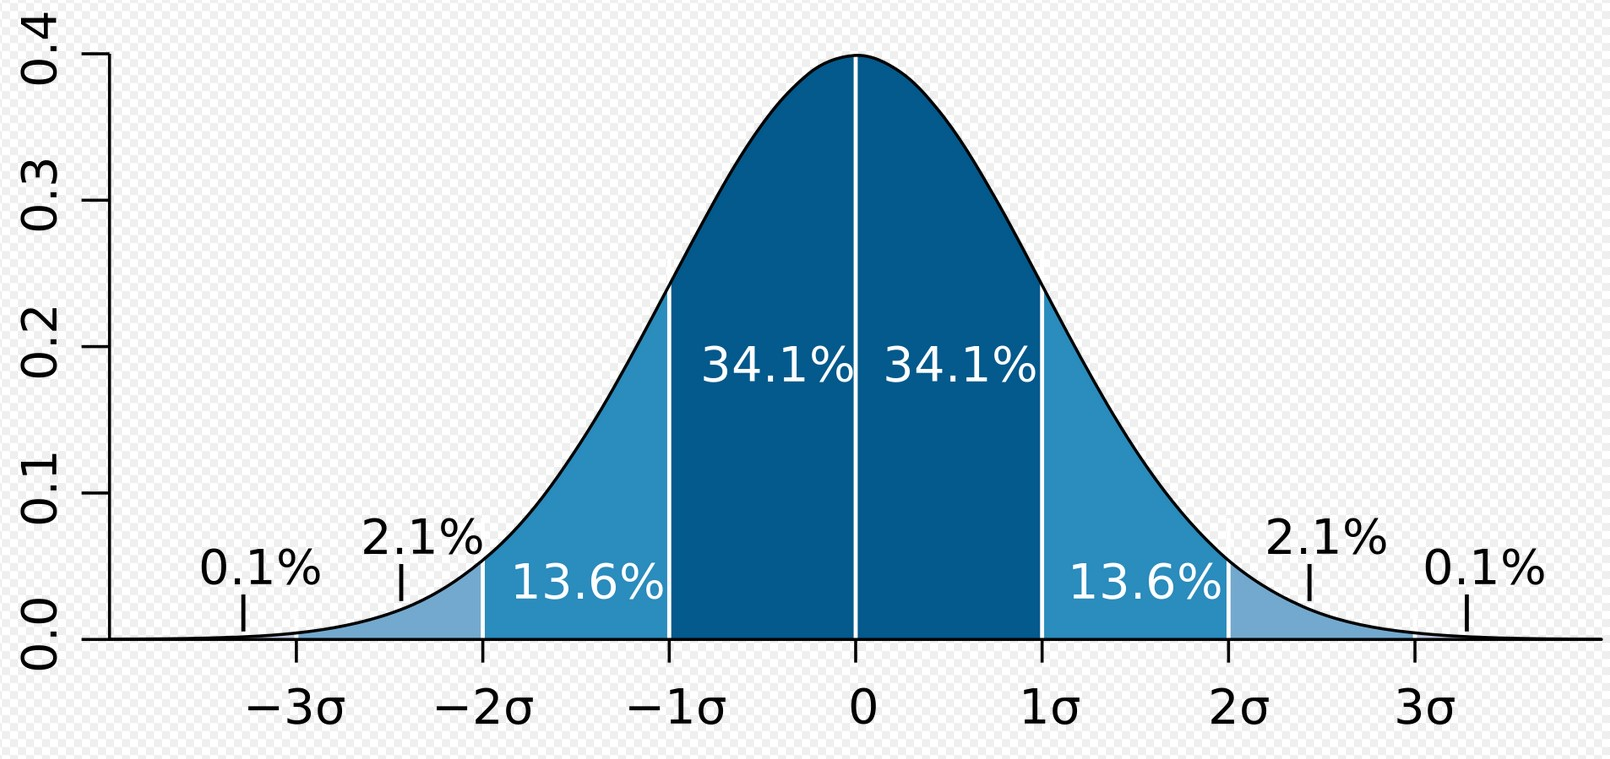

Probability density function of a normal distribution

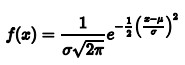

The red curve is the standard normal distribution

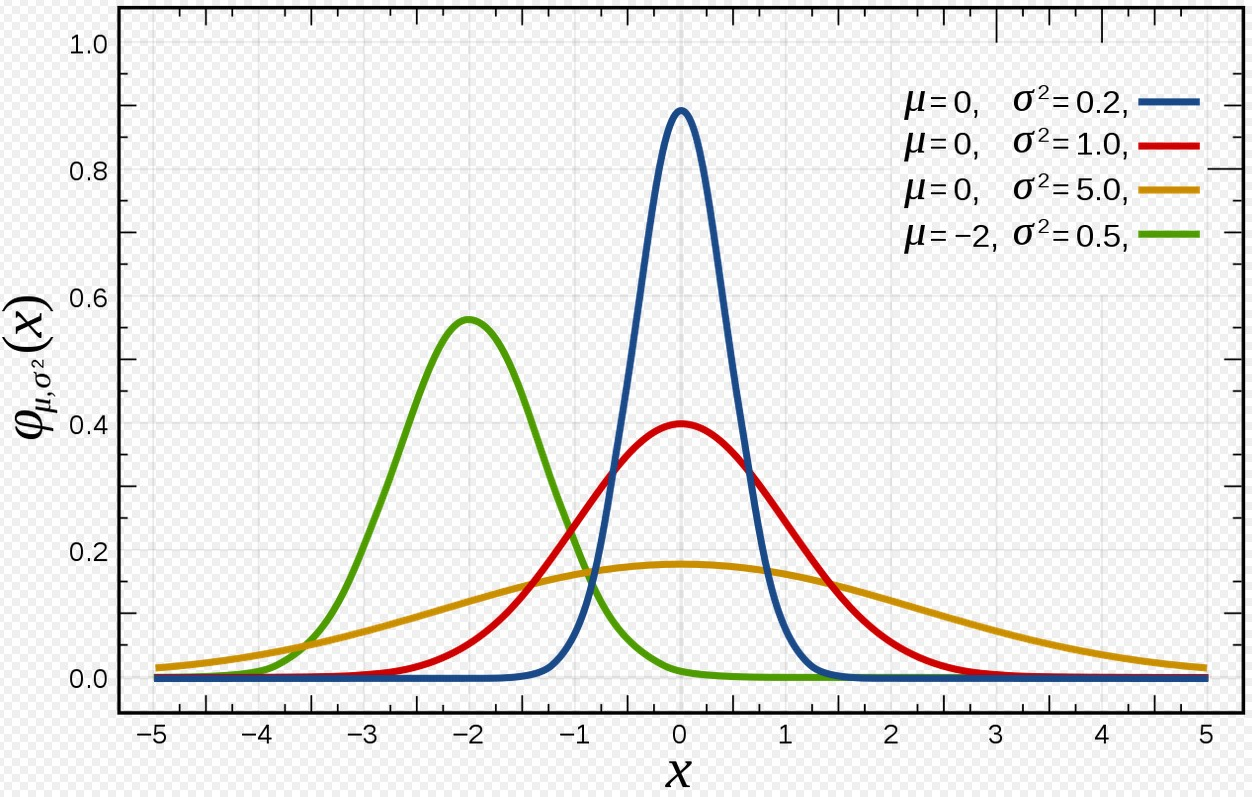

Cummulative distribution function of a normal distribution

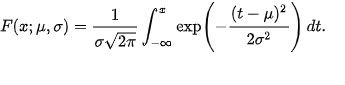

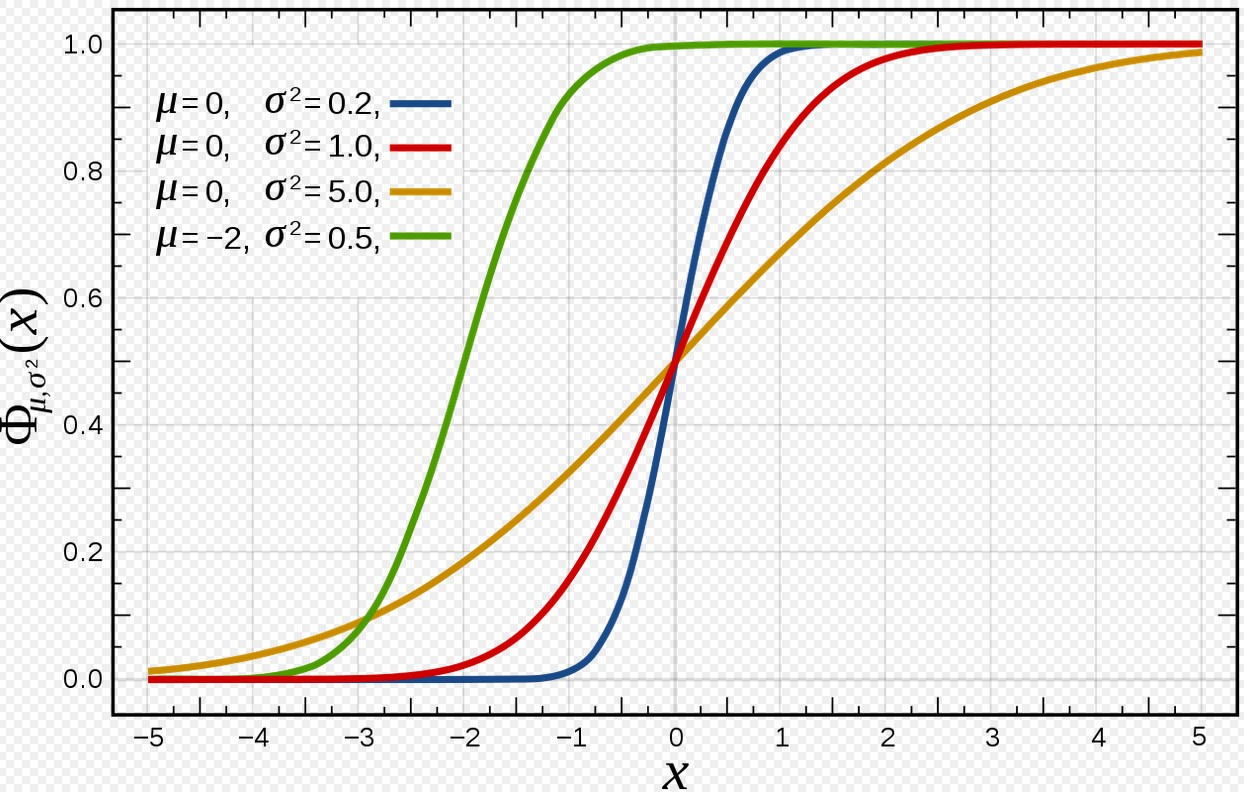

Z-table: <a href="https://en.wikipedia.org/wiki/Standard_normal_table">Standard normal table</a>

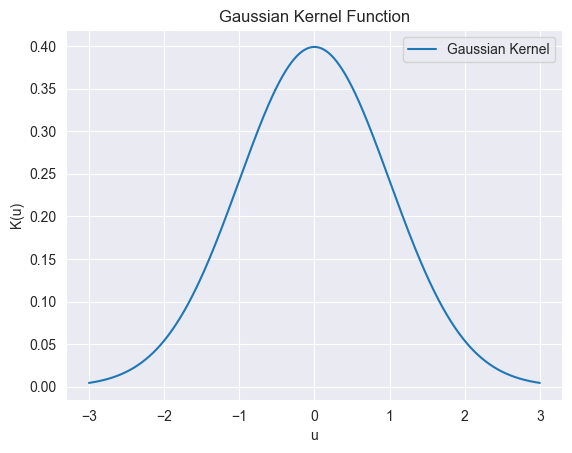

In [10]:
def gaussian_kernel(u):
    return 1 / np.sqrt(2 * np.pi) * np.exp(-0.5 * u**2)

u_values = np.linspace(-3, 3, 1000)

kernel_values = gaussian_kernel(u_values)

plt.plot(u_values, kernel_values, label='Gaussian Kernel')
plt.title('Gaussian Kernel Function')
plt.xlabel('u')
plt.ylabel('K(u)')
plt.legend()
plt.show()

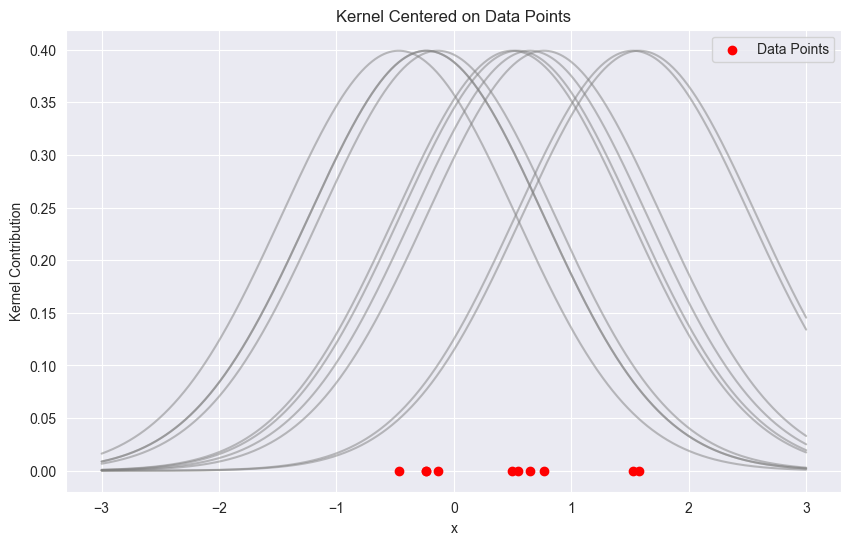

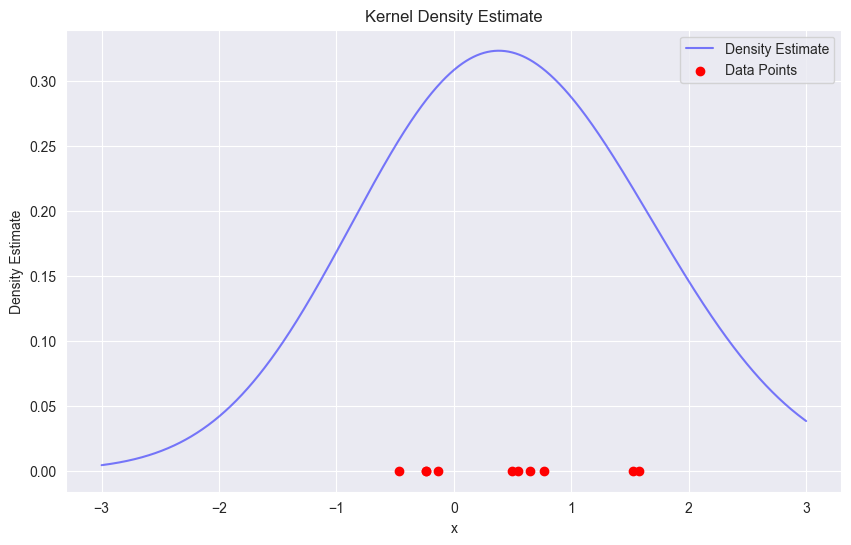

In [13]:
from scipy.stats import norm

np.random.seed(42)
data = np.random.normal(loc=0, scale=1, size=10)

def gaussian_kernel(x, xi, bandwidth):
    return norm.pdf((x - xi) / bandwidth) / bandwidth

bandwidth = 1.0

x_values = np.linspace(-3, 3, 1000)
plt.figure(figsize=(10, 6))

for xi in data:
    kernel_values = gaussian_kernel(x_values, xi, bandwidth)
    plt.plot(x_values, kernel_values, color='gray', alpha=0.5)
    
plt.scatter(data, np.zeros_like(data), color='red', marker='o', label='Data Points')
plt.title('Kernel Centered on Data Points')
plt.xlabel('x')
plt.ylabel('Kernel Contribution')
plt.legend()
plt.show()

density_estimate = np.zeros_like(x_values)

for xi in data:
    density_estimate += gaussian_kernel(x_values, xi, bandwidth)
    
density_estimate /= (len(data) * bandwidth)

plt.figure(figsize=(10, 6))
plt.plot(x_values, density_estimate, label= "Density Estimate", color='blue', alpha=0.5)
plt.scatter(data, np.zeros_like(data), color='red', marker='o', label='Data Points')
plt.title('Kernel Density Estimate')
plt.xlabel('x')
plt.ylabel('Density Estimate')
plt.legend()
plt.show()

### Plot the density using matplotlib and seaborn

Check if the data is drawn from a normal distribution

Integral of Kernel Density Estimation is  0.9989648063544116
Integral under the curve of the true distribution :  0.9995138177439781


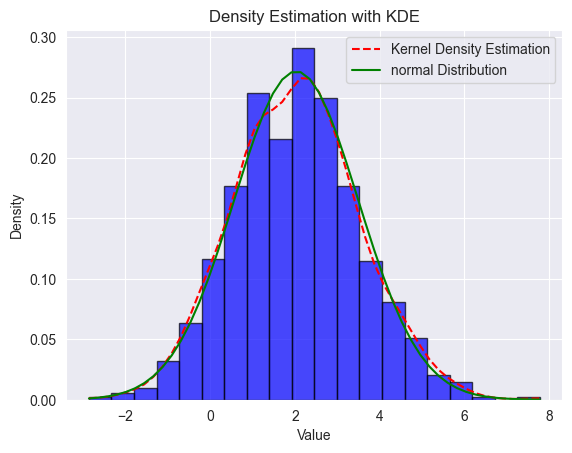

In [14]:
data = np.random.normal(2, 1.5, size=1000)

plt.hist(data, bins=20, density=True, color='blue', alpha=0.7, edgecolor='black')
x =np.linspace(data.min(), data.max())
kde = gaussian_kde(data)
estimated_y = kde(x)
plt.plot(x, estimated_y, color='red', linestyle='dashed', label='Kernel Density Estimation')

intergral = np.trapz(estimated_y, x)
print("Integral of Kernel Density Estimation is ",intergral)

true_y = norm.pdf(x, loc = np.mean(data), scale = np.std(data))
plt.plot(x, true_y, color= "green", linestyle='-', label="normal Distribution")

integral = np.trapz(true_y, x)
print("Integral under the curve of the true distribution : ", integral)

plt.title("Density Estimation with KDE")
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()


Integral under the curve of the estimation:   0.9964058646121227
Integral under the curve of the true distribution:  0.9976268203582165


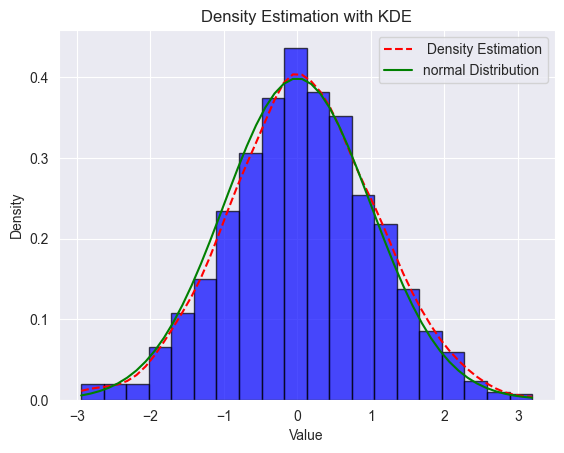

In [15]:
data = np.random.normal(0, 1, size=1000)

plt.hist(data, bins= 20, density=True, color='blue', alpha=0.7, edgecolor='black')
x = np.linspace(data.min(), data.max())
kde = gaussian_kde(data)
estimated_y = kde(x)
plt.plot(x, estimated_y, color="red", linestyle="--", label=' Density Estimation')

intergral = np.trapz(estimated_y, x)
print("Integral under the curve of the estimation:  ",intergral)

true_y = norm.pdf(x)
plt.plot(x, true_y, color="green", linestyle='-', label="normal Distribution")

integral = np.trapz(true_y, x)
print("Integral under the curve of the true distribution: ", integral)

plt.title("Density Estimation with KDE")
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

Seaborn

In [16]:
data = [2, 3, 4, 2, 5, 6, 4, 3, 5, 3, 4, 4, 3, 2, 5, 4, 3, 4]

statistic, p_value = shapiro(data)

alpha = 0.05
print(f"Sharpio-Wilk test statistic is {statistic}")
print(f"P-value is {p_value}")

if p_value > alpha:
    print("The data is likely drawn from a normal distribution")
else:
    print("The data is likely drawn from a normal distribution")

Sharpio-Wilk test statistic is 0.9255572415419708
P-value is 0.16213288691485317
The data is likely drawn from a normal distribution


Calculate the probability of a data range

Integral under the curve of the estimation:  0.8621683677081177
Probability of 3 : 0.2659352907994043


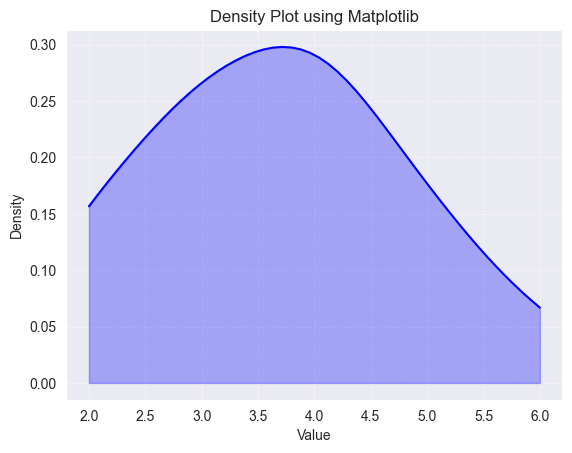

In [17]:
data = np.array([2, 3, 4, 2, 5, 6, 4, 3, 5, 3, 4, 4, 3, 2, 5, 4, 3, 4])

kde = gaussian_kde(data)

x = np.linspace(data.min(), data.max())

y=kde(x)

plt.plot(x, y, color='blue')
plt.fill_between(x,0, y, color='blue', alpha=0.3)
plt.title("Density Plot using Matplotlib")
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.5)

integral = np.trapz(y, x)
print("Integral under the curve of the estimation: ", integral)

value = 3
probability = np.interp(value, x, y)
print("Probability of",value, ":", probability)

Plot histogram in combination with density plot

integral under the curve: 0.8621683677081177
Probability of 3 : 0.26598230290916003


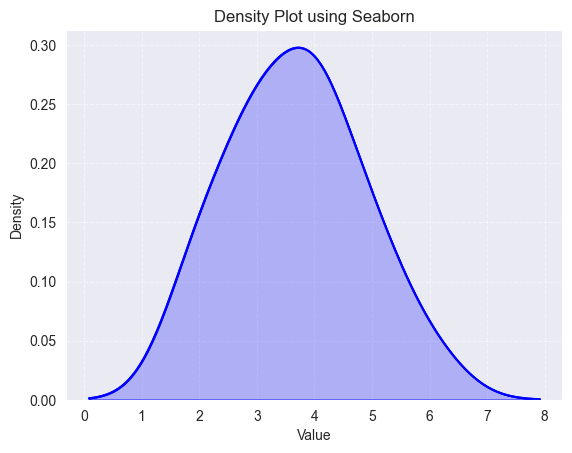

In [18]:
data = [2, 3, 4, 2, 5, 6, 4, 3, 5, 3, 4, 4, 3, 2, 5, 4, 3, 4]

sns.kdeplot(data, color="blue", fill = True)
plt.title("Density Plot using Seaborn")
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.5)

x = sns.kdeplot(data, color="blue").get_lines()[0].get_xdata()
y = sns.kdeplot(data, color="blue").get_lines()[0].get_ydata()

intergral = np.trapz(y, x)
print("integral under the curve:", integral)

value = 3
probality = np.interp(value, x, y)
print("Probability of", value, ":", probality)

Probability of range [ 2 , 3 ]: 0.0


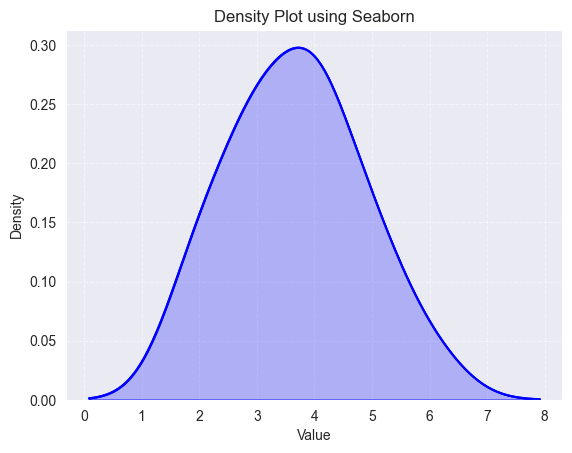

In [19]:
data = [2, 3, 4, 2, 5, 6, 4, 3, 5, 3, 4, 4, 3, 2, 5, 4, 3, 4]

sns.kdeplot(data, color="blue", fill = True)
plt.title("Density Plot using Seaborn")
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.5)

x = sns.kdeplot(data, color="blue").get_lines()[0].get_xdata()
y = sns.kdeplot(data, color="blue").get_lines()[0].get_ydata()

range_start = 2
range_stop = 3

start_index = np.where(x>= range_start)[0][0]
end_index = np.where(x<= range_start)[0][-1]

probability = np.trapz(y[start_index:end_index+1],
                       x[start_index:end_index+1])

print("Probability of range [", range_start, ",", range_stop, "]:", probability)

Plot two density plots using matplotlib

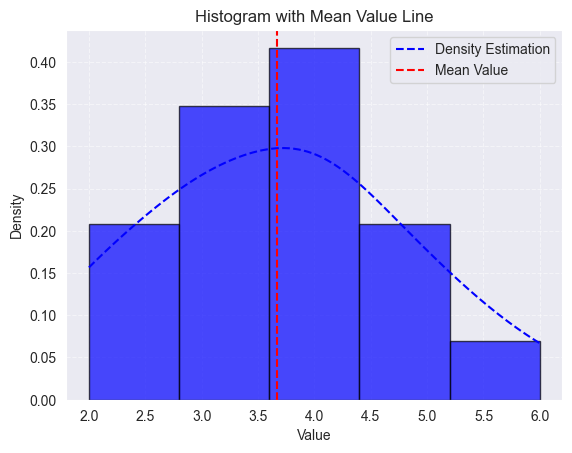

In [26]:
data = [2, 3, 4, 2, 5, 6, 4, 3, 5, 3, 4, 4, 3, 2, 5, 4, 3, 4]

plt.hist(data, bins=5, color='blue', alpha=0.7, edgecolor='black', density=True, zorder=2)

density = gaussian_kde(data)
x = np.linspace(min(data), max(data), 100)
y = density(x)
plt.plot(x, y, color="blue", linestyle='--', label='Density Estimation')

mean_value = np.mean(data)
plt.axvline(mean_value, color='red', linestyle='dashed', label='Mean Value')

plt.title("Histogram with Mean Value Line")
plt.xlabel("Value")
plt.ylabel("Density")

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

Fill colors

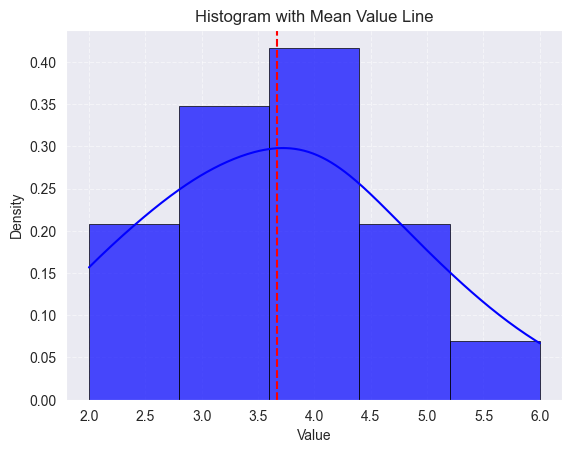

In [28]:
data = [2, 3, 4, 2, 5, 6, 4, 3, 5, 3, 4, 4, 3, 2, 5, 4, 3, 4]

sns.histplot(data, bins=5, color='blue', edgecolor='black',zorder=2, alpha=0.7, linewidth=0.5, kde = True, stat='density')

mean_value = np.mean(data)
plt.axvline(mean_value, color='red', linestyle='dashed', label='Mean Value')

plt.title("Histogram with Mean Value Line")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(True, linestyle='--', alpha=0.5)

Plot two density plots using seaborn

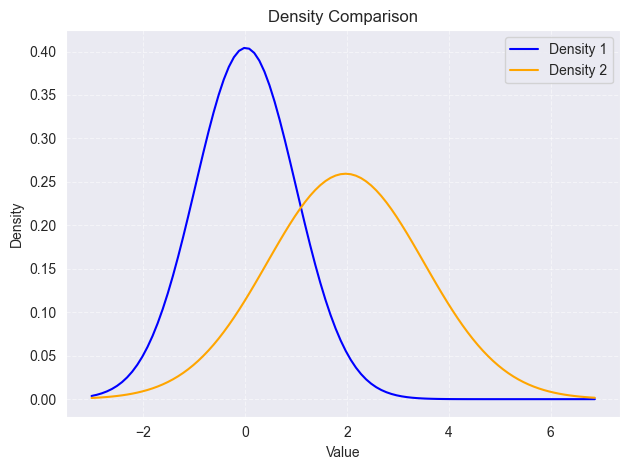

In [29]:
data1 = np.random.normal(0, 1, 1000)
data2 = np.random.normal(2, 1.5, 1000)

min_value= min(np.min(data1), np.min(data2))
max_value=max(np.max(data1), np.max(data2))

x = np.linspace(min_value, max_value, 100)
density1 = norm.pdf(x, loc=np.mean(data1), scale=np.std(data1))
plt.plot(x, density1, color="blue", linestyle="-", label = "Density 1", zorder=2 )

density2 = norm.pdf(x, loc=np.mean(data2), scale=np.std(data2))
plt.plot(x, density2, color="orange", linestyle="-", label="Density 2", zorder=2 )

plt.title("Density Comparison")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

Use density plot for the Iris dataset

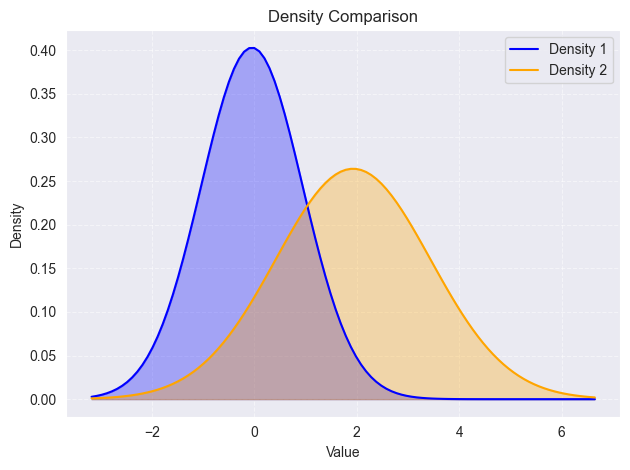

In [30]:
data1 = np.random.normal(0, 1, 1000)
data2 = np.random.normal(2, 1.5, 1000)

min_value= min(np.min(data1), np.min(data2))
max_value=max(np.max(data1), np.max(data2))

x = np.linspace(min_value, max_value, 100)
density1 = norm.pdf(x, loc=np.mean(data1), scale=np.std(data1))
plt.plot(x, density1, color="blue", linestyle="-", label="Density 1", zorder=2 )

density2 = norm.pdf(x, loc=np.mean(data2), scale=np.std(data2))
plt.plot(x, density2, color="orange", linestyle="-", label="Density 2", zorder=2 )

plt.fill_between(x, density1, color="blue", alpha=0.3)
plt.fill_between(x, density2, color="orange", alpha=0.3)

plt.title("Density Comparison")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

Plot the density for all features

Plot in multiple rows and columns